In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
data = pd.read_csv("Insurance_dataset.csv")

In [17]:
data.head()

,Age,BMI,Smoker,Number_of_Children,Gender,Region,Insurance_Cost
0,56,19.0,no,3,male,southwest,1601.28
1,69,28.0,no,3,male,northwest,2900.81
2,46,23.2,no,3,female,southwest,2249.51
3,32,19.9,no,2,male,southeast,1662.48
4,60,23.8,no,3,male,southwest,2149.76


In [18]:
data.shape

(1000, 7)

In [19]:
print("The Dataset has",data.shape[0],"Rows")
print("The Dataset has",data.shape[1],"Columns")

The Dataset has 1000 Rows
The Dataset has 7 Columns


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1000 non-null   int64  
 1   BMI                 1000 non-null   float64
 2   Smoker              1000 non-null   object 
 3   Number_of_Children  1000 non-null   int64  
 4   Gender              1000 non-null   object 
 5   Region              1000 non-null   object 
 6   Insurance_Cost      1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,43.81900,14.991030,18.00,31.000,44.000,56.0000,69.00
BMI,1000.0,27.28810,4.941707,12.50,23.900,27.300,30.4250,40.20
Number_of_Children,1000.0,1.96600,1.416634,0.00,1.000,2.000,3.0000,4.00
Insurance_Cost,1000.0,3888.04372,4072.350340,-384.27,1558.015,2102.805,2984.0675,13461.33


In [22]:
data.isnull().sum()

Age                   0
BMI                   0
Smoker                0
Number_of_Children    0
Gender                0
Region                0
Insurance_Cost        0
dtype: int64

#### Numerical:
#### -----------------------
1) 'Age'
2) 'BMI'
3) 'Number_of_Children'
4) 'Insurance_Cost'

#### Categorical:
#### ----------------------
1) 'Smoker'
2) 'Gender'
3) 'Region'

In [24]:
#Understand uniaue values prsent for categorical data
len(data.Region.unique())

4

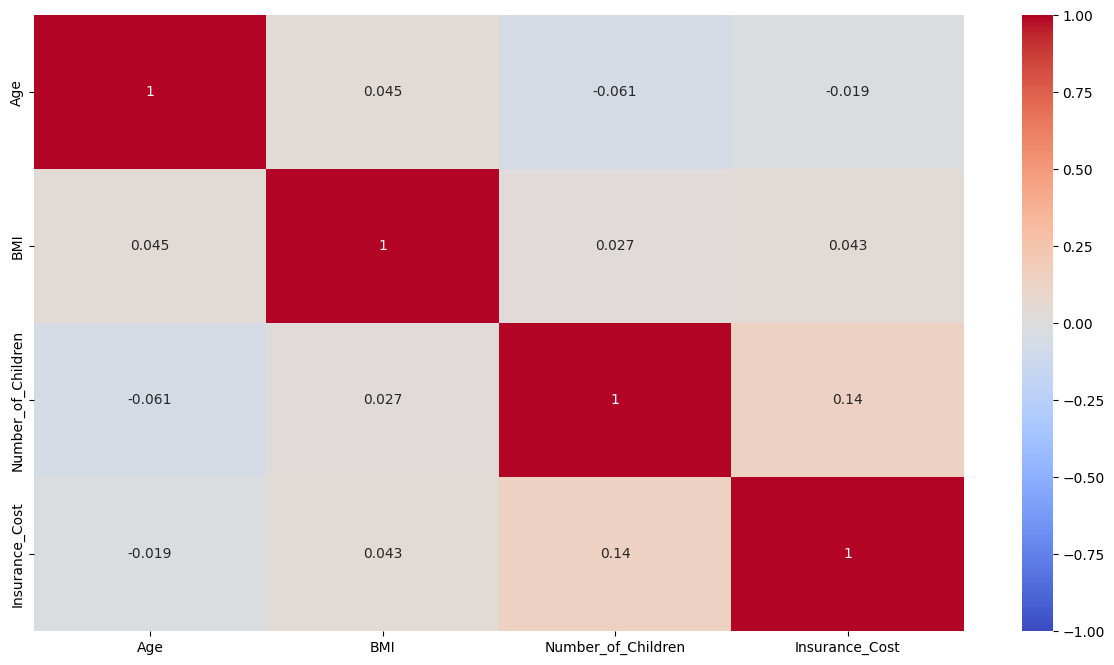

In [25]:
#To understand the co-linearity let us create heatmap
plt.figure(figsize=(15, 8))
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

In [27]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data[["Smoker","Gender","Region"]]=oe.fit_transform(data[["Smoker","Gender","Region"]])

In [28]:
data.columns

Index(['Age', 'BMI', 'Smoker', 'Number_of_Children', 'Gender', 'Region',
       'Insurance_Cost'],
      dtype='object')

In [29]:
data.head()

,Age,BMI,Smoker,Number_of_Children,Gender,Region,Insurance_Cost
0,56,19.0,0.0,3,1.0,3.0,1601.28
1,69,28.0,0.0,3,1.0,1.0,2900.81
2,46,23.2,0.0,3,0.0,3.0,2249.51
3,32,19.9,0.0,2,1.0,2.0,1662.48
4,60,23.8,0.0,3,1.0,3.0,2149.76


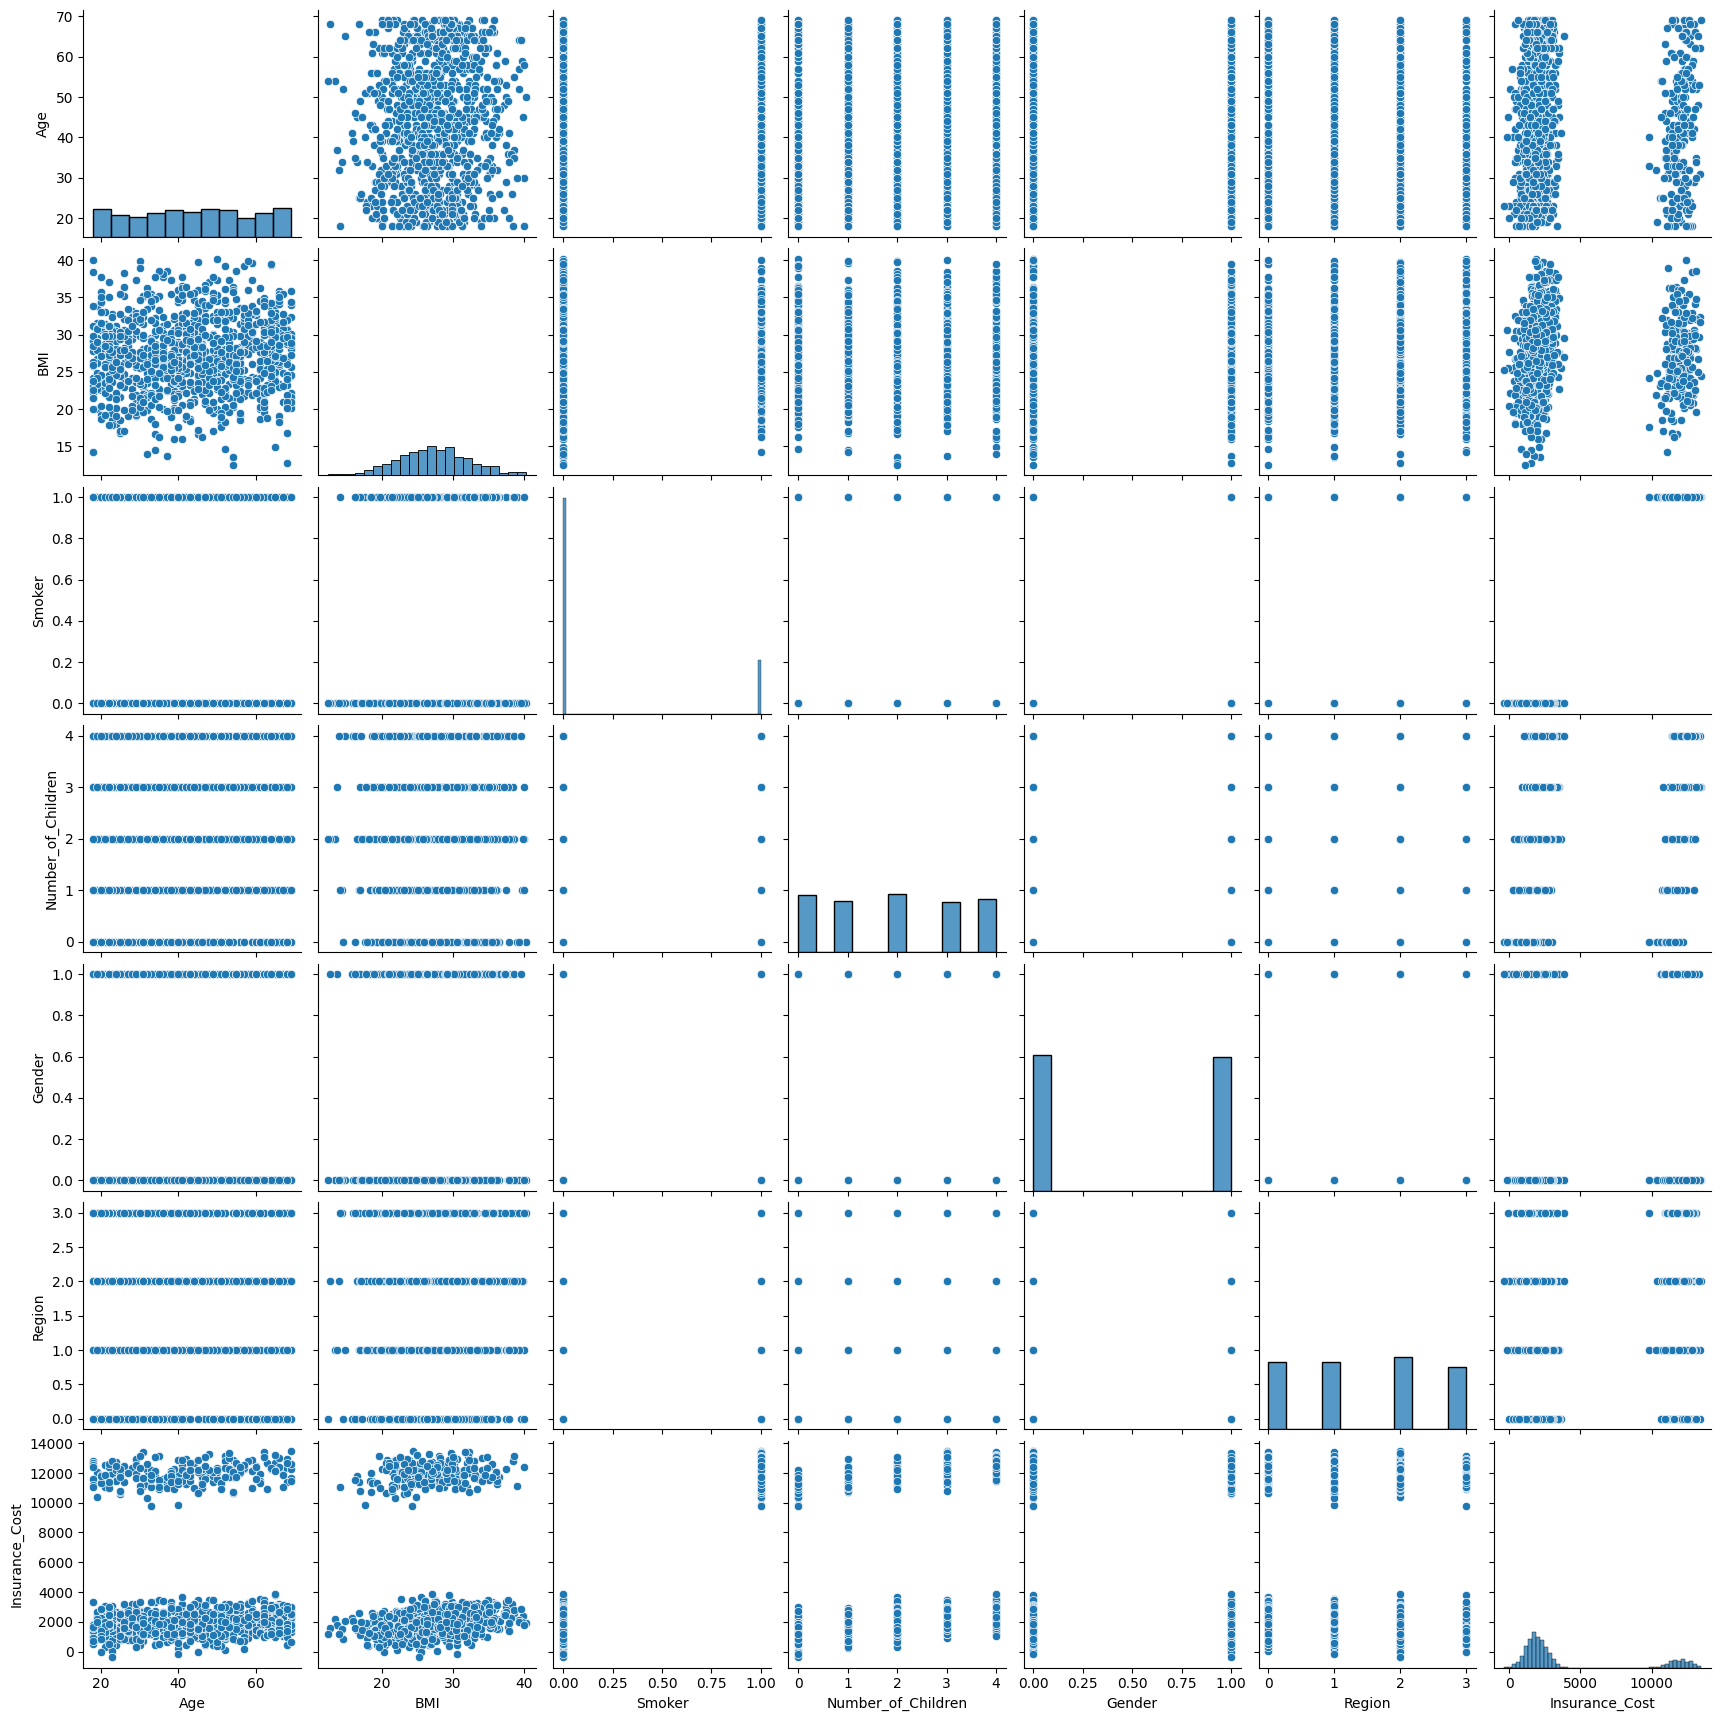

In [30]:
sns.pairplot(data)

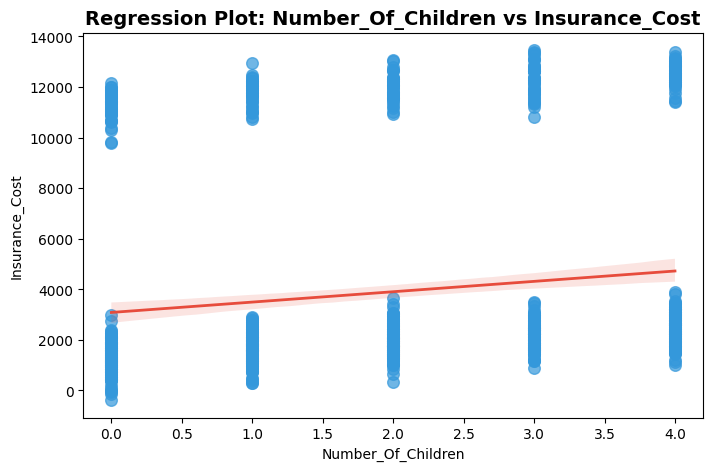

In [31]:
#Insurance_Cost vs Number_of_Children
plt.figure(figsize=(8, 5))
sns.regplot(
    data=data,
    x='Number_of_Children',
    y='Insurance_Cost',
    scatter_kws={'color':'#3498db', 'alpha':0.7, 's':70},
    line_kws={'color':'#e74c3c', 'lw':2}
)
plt.title("Regression Plot: Number_Of_Children vs Insurance_Cost", fontsize=14, weight='bold')
plt.xlabel("Number_Of_Children")
plt.ylabel("Insurance_Cost")
plt.show()

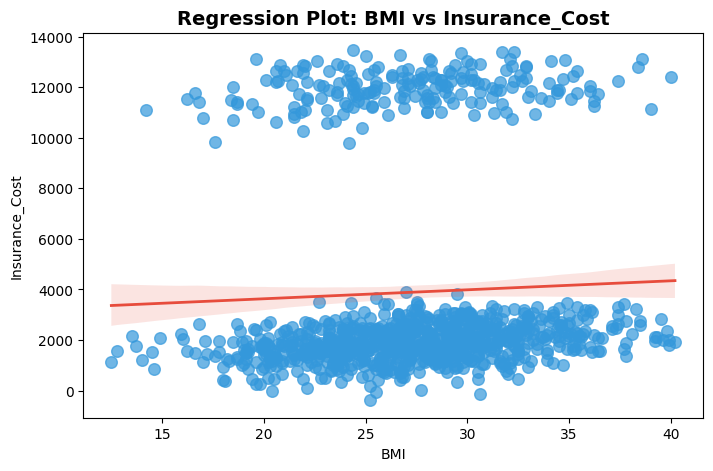

In [32]:
#Insurance_Cost vs BMI
plt.figure(figsize=(8, 5))
sns.regplot(
    data=data,
    x='BMI',
    y='Insurance_Cost',
    scatter_kws={'color':'#3498db', 'alpha':0.7, 's':70},
    line_kws={'color':'#e74c3c', 'lw':2}
)
plt.title("Regression Plot: BMI vs Insurance_Cost", fontsize=14, weight='bold')
plt.xlabel("BMI")
plt.ylabel("Insurance_Cost")
plt.show()

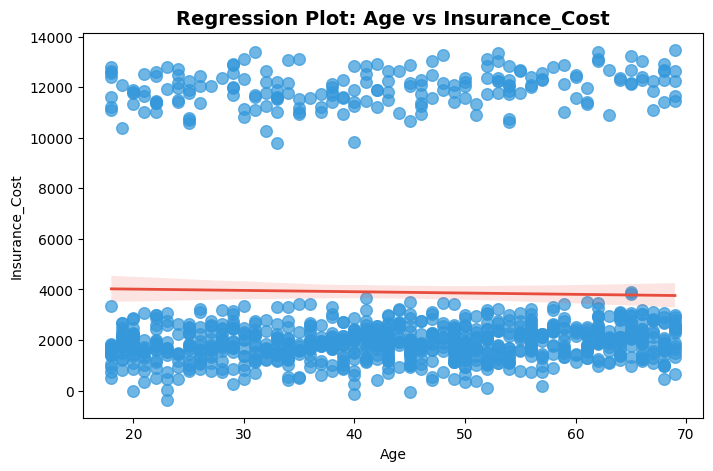

In [33]:
#Insurance_Cost vs Age
plt.figure(figsize=(8, 5))
sns.regplot(
    data=data,
    x='Age',
    y='Insurance_Cost',
    scatter_kws={'color':'#3498db', 'alpha':0.7, 's':70},
    line_kws={'color':'#e74c3c', 'lw':2}
)
plt.title("Regression Plot: Age vs Insurance_Cost", fontsize=14, weight='bold')
plt.xlabel("Age")
plt.ylabel("Insurance_Cost")
plt.show()

In [35]:
X=data.drop('Insurance_Cost', axis=1) #Independent Features
y=data['Insurance_Cost'] #Dependent Feature

In [36]:
X.head()

,Age,BMI,Smoker,Number_of_Children,Gender,Region
0,56,19.0,0.0,3,1.0,3.0
1,69,28.0,0.0,3,1.0,1.0
2,46,23.2,0.0,3,0.0,3.0
3,32,19.9,0.0,2,1.0,2.0
4,60,23.8,0.0,3,1.0,3.0


In [37]:
y.head()

0    1601.28
1    2900.81
2    2249.51
3    1662.48
4    2149.76
Name: Insurance_Cost, dtype: float64

In [39]:
#Preprocessing
"""include_bias=True (default): This setting will generate a bias column,
which is a column of ones. This column represents the feature where all polynomial powers are zero, 
effectively acting as an intercept term in a subsequent linear model.

include_bias=False: This setting will not generate the bias column. 
This is often done when the subsequent estimator (e.g., LinearRegression) implicitly adds an intercept term by default,
to avoid redundancy."""

polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)

In [40]:
poly_features=polynomial_converter.fit(X)

In [41]:
poly_features=polynomial_converter.transform(X)

In [42]:
poly_features.shape

(1000, 27)

In [43]:
X.shape

(1000, 6)

In [46]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(
    poly_features, 
    y, 
    test_size=0.2, 
    random_state=100)

In [47]:
polymodel=LinearRegression()

In [48]:
polymodel.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
y_pred=polymodel.predict(X_test)

In [51]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) })

,Y_Test,Y_Pred,Residuals
249,1306.98,1764.802757,-457.822757
353,2264.33,2510.693871,-246.363871
537,1725.05,1378.041162,347.008838
424,2073.91,855.486152,1218.423848
564,12280.83,12564.406132,-283.576132
...,...,...,...
684,2212.34,2301.343990,-89.003990
644,1779.59,1983.677256,-204.087256
110,2633.29,1835.229729,798.060271
28,11956.14,12029.669057,-73.529057


In [52]:
print(f"The R2 value of the model is {metrics.r2_score(y_test, y_pred)}")

The R2 value of the model is 0.9841811194563574


In [53]:
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly],
             index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,407.640284
MSE,269716.889619
RMSE,519.342748


In [54]:
#compare with simple linear regression
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.2, random_state=42)
simplemodel=LinearRegression()
simplemodel.fit(XS_train, ys_train)
ys_pred=simplemodel.predict(XS_test)

MAE_simple = metrics.mean_absolute_error(ys_test,ys_pred)
MSE_simple = metrics.mean_squared_error(ys_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)

In [55]:
pd.DataFrame({'Poly Metrics': [MAE_Poly, MSE_Poly, RMSE_Poly], 
              'Simple Metrics':[MAE_simple, MSE_simple, RMSE_simple]}, 
               index=['MAE', 'MSE', 'RMSE'])

,Poly Metrics,Simple Metrics
MAE,407.640284,391.095856
MSE,269716.889619,256476.189677
RMSE,519.342748,506.434783


In [56]:
#Adjusting Model Parameters
# Train List of RMSE per degree
train_RMSE_list=[]
#Test List of RMSE per degree
test_RMSE_list=[]

for d in range(1,10):
    
    #Preprocessing
    #create poly data set for degree (d)
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit(X)
    poly_features= polynomial_converter.transform(X)
    
    #Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
    
    #Train the Model
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)
    
    #Predicting on both Train & Test Data
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)
    
    #Evaluating the Model
    
    #RMSE of Train set
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    #RMSE of Test Set
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    #Append the RMSE to the Train and Test List
    
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [57]:
pd.DataFrame({'Train RMSE List':train_RMSE_list})

,Train RMSE List
0,480.246203
1,473.155535
2,459.750611
3,432.118214
4,388.607984
5,337.134799
6,311.498885
7,297.442428
8,298.483513


In [58]:
pd.DataFrame({'Test RMSE List':test_RMSE_list})

,Test RMSE List
0,506.434783
1,504.061304
2,507.215129
3,588.060624
4,907.400344
5,8374.348507
6,14498.906245
7,22747.058258
8,153265.003122


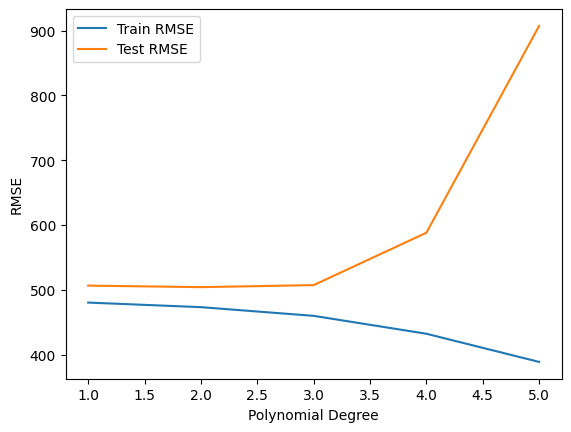

In [59]:
plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE')
plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE')

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()